In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from tensorflow import keras

In [2]:
player_data = pd.read_csv('cleaned_players.csv')

In [3]:
goalie_data = pd.read_csv('cleaned_goalies.csv')

In [4]:
player_data

,Player,Pos,Min,Gls,Ast,xG,npxG,xA,Sh,SoT,Fls,Fld,Crs,TklW,Int,CrdY,CrdR,position_group,Premier League
0,Roberto Firmino,FW,86.0,0,1,0.9,0.9,0.4,4,1,0,1,0,1,0,0,0,Forward,PL
1,James Milner,CM,4.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Midfield,PL
2,Divock Origi,LW,74.0,1,0,0.2,0.2,0.0,1,1,0,2,4,3,1,0,0,Forward,PL
3,Sadio Mané,LW,16.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Forward,PL
4,Mohamed Salah,RW,90.0,1,1,0.3,0.3,0.2,2,1,1,1,7,0,0,0,0,Forward,PL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20370,Riyad Mahrez,CM,90.0,1,2,0.1,0.1,0.5,2,2,1,1,4,1,1,0,0,Midfield,PL
20371,Christian Fuchs,LB,90.0,0,0,0.0,0.0,0.0,0,0,1,0,1,0,4,0,0,Defender,PL
20372,Harry Maguire,CB,90.0,0,0,0.4,0.4,0.0,4,1,0,1,0,2,5,0,0,Defender,PL
20373,Wes Morgan,CB,90.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,Defender,PL


In [5]:
forward_data = player_data[player_data['position_group'] == 'Forward']
forward_data

,Player,Pos,Min,Gls,Ast,xG,npxG,xA,Sh,SoT,Fls,Fld,Crs,TklW,Int,CrdY,CrdR,position_group,Premier League
0,Roberto Firmino,FW,86.0,0,1,0.9,0.9,0.4,4,1,0,1,0,1,0,0,0,Forward,PL
2,Divock Origi,LW,74.0,1,0,0.2,0.2,0.0,1,1,0,2,4,3,1,0,0,Forward,PL
3,Sadio Mané,LW,16.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Forward,PL
4,Mohamed Salah,RW,90.0,1,1,0.3,0.3,0.2,2,1,1,1,7,0,0,0,0,Forward,PL
12,Teemu Pukki,FW,83.0,1,0,0.4,0.4,0.1,3,1,0,1,0,1,1,0,0,Forward,PL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20353,Harry Kane,FW,90.0,2,0,0.2,0.2,0.0,3,2,1,0,0,0,0,0,0,Forward,PL
20354,Lucas Moura,LW,74.0,0,1,0.1,0.1,0.0,2,0,2,2,0,0,0,0,0,Forward,PL
20356,Érik Lamela,RW,78.0,2,0,1.3,1.3,0.0,2,2,0,2,1,1,2,0,0,Forward,PL
20361,Son Heung-min,FW,6.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Forward,PL


In [6]:
mid_data = player_data[player_data['position_group'] == 'Midfield']
mid_data

,Player,Pos,Min,Gls,Ast,xG,npxG,xA,Sh,SoT,Fls,Fld,Crs,TklW,Int,CrdY,CrdR,position_group,Premier League
1,James Milner,CM,4.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,Midfield,PL
5,Georginio Wijnaldum,CM,90.0,0,0,0.0,0.0,0.0,0,0,2,2,0,0,1,0,0,Midfield,PL
6,Jordan Henderson,CM,90.0,0,0,0.2,0.2,0.0,2,1,2,2,4,0,2,0,0,Midfield,PL
7,Fabinho,DM,90.0,0,0,0.0,0.0,0.0,1,1,1,1,0,2,2,0,0,Midfield,PL
16,Marco Stiepermann,AM,58.0,0,0,0.2,0.2,0.0,3,1,0,1,0,0,0,0,0,Midfield,PL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20360,Moussa Sissoko,DM,84.0,0,0,0.0,0.0,0.0,1,0,0,0,0,2,0,0,0,Midfield,PL
20367,Demarai Gray,CM,61.0,0,0,0.2,0.2,0.2,1,1,2,2,2,0,1,0,0,Midfield,PL
20368,Kelechi Iheanacho,CM,85.0,1,0,0.3,0.3,0.1,4,3,1,1,0,1,0,0,0,Midfield,PL
20369,Harvey Barnes,CM,5.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,Midfield,PL


In [7]:
defense_data = player_data[player_data['position_group'] == 'Defender']
defense_data

,Player,Pos,Min,Gls,Ast,xG,npxG,xA,Sh,SoT,Fls,Fld,Crs,TklW,Int,CrdY,CrdR,position_group,Premier League
8,Andrew Robertson,LB,90.0,0,0,0.0,0.0,0.0,2,0,0,0,9,2,1,0,0,Defender,PL
9,Virgil van Dijk,CB,90.0,1,0,0.0,0.0,0.0,1,1,0,0,0,2,5,0,0,Defender,PL
10,Joe Gomez,CB,90.0,0,0,0.0,0.0,0.0,0,0,2,0,0,1,0,0,0,Defender,PL
11,Trent Alexander-Arnold,RB,90.0,0,1,0.1,0.1,1.0,2,1,1,0,8,1,2,0,0,Defender,PL
21,Jamal Lewis,LB,90.0,0,0,0.0,0.0,0.1,0,0,0,0,1,1,0,0,0,Defender,PL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20365,Kyle Walker-Peters,RB,90.0,0,2,0.0,0.0,1.3,0,0,1,2,4,2,3,0,0,Defender,PL
20371,Christian Fuchs,LB,90.0,0,0,0.0,0.0,0.0,0,0,1,0,1,0,4,0,0,Defender,PL
20372,Harry Maguire,CB,90.0,0,0,0.4,0.4,0.0,4,1,0,1,0,2,5,0,0,Defender,PL
20373,Wes Morgan,CB,90.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,Defender,PL


In [8]:
goalie_data

,Player,Min,GA,Saves,Save%
0,Alisson,39.0,0,2,100.0
1,Adrián,51.0,1,3,75.0
2,Tim Krul,90.0,4,3,42.9
3,Łukasz Fabiański,90.0,5,4,44.4
4,Ederson,90.0,0,3,100.0
...,...,...,...,...,...
2108,Thibaut Courtois,90.0,3,4,57.1
2109,Adrián,90.0,1,6,85.7
2110,Jordan Pickford,90.0,3,1,25.0
2111,Hugo Lloris,90.0,4,5,55.6


In [9]:
# Groupby player mean
player_data_mean = player_data.groupby(["Player"]).mean()
player_data_mean.head()

,Min,Gls,Ast,xG,npxG,xA,Sh,SoT,Fls,Fld,Crs,TklW,Int,CrdY,CrdR
Player,,,,,,,,,,,,,,,
Aaron Connolly,49.058824,0.117647,0.000000,0.137500,0.137500,0.011765,1.470588,0.529412,0.647059,1.705882,0.470588,0.235294,0.000000,0.000000,0.000000
Aaron Cresswell,84.645570,0.050633,0.101266,0.025316,0.025316,0.063291,0.582278,0.139241,0.468354,0.518987,4.632911,0.670886,1.202532,0.189873,0.000000
Aaron Lennon,60.300000,0.016667,0.050000,0.021667,0.021667,0.041667,0.316667,0.116667,0.733333,0.716667,1.183333,0.800000,0.616667,0.116667,0.000000
Aaron Mooy,81.103448,0.103448,0.057471,0.073563,0.055172,0.111628,1.126437,0.298851,0.701149,0.436782,4.793103,1.275862,0.804598,0.114943,0.011494
Aaron Wan-Bissaka,89.602941,0.000000,0.073529,0.008824,0.008824,0.069118,0.235294,0.014706,0.573529,0.500000,2.205882,1.779412,2.250000,0.147059,0.014706


In [10]:
# Groupby player sum
player_data_sum = player_data.groupby(["Player"]).sum()
player_data_sum.head()

,Min,Gls,Ast,xG,npxG,xA,Sh,SoT,Fls,Fld,Crs,TklW,Int,CrdY,CrdR
Player,,,,,,,,,,,,,,,
Aaron Connolly,834.0,2,0,2.2,2.2,0.2,25,9,11,29,8,4,0,0,0
Aaron Cresswell,6687.0,4,8,2.0,2.0,5.0,46,11,37,41,366,53,95,15,0
Aaron Lennon,3618.0,1,3,1.3,1.3,2.5,19,7,44,43,71,48,37,7,0
Aaron Mooy,7056.0,9,5,6.4,4.8,9.6,98,26,61,38,417,111,70,10,1
Aaron Wan-Bissaka,6093.0,0,5,0.6,0.6,4.7,16,1,39,34,150,121,153,10,1


In [11]:
# Groupby player (forward) sum
forward_data_sum = forward_data.groupby(["Player"]).sum()
forward_data_sum.head()

,Min,Gls,Ast,xG,npxG,xA,Sh,SoT,Fls,Fld,Crs,TklW,Int,CrdY,CrdR
Player,,,,,,,,,,,,,,,
Aaron Connolly,789.0,2,0,2.2,2.2,0.2,23,8,11,26,7,4,0,0,0
Aaron Lennon,1325.0,1,1,0.3,0.3,0.9,7,3,13,19,32,16,9,1,0
Aaron Mooy,960.0,0,0,0.7,0.7,2.7,18,8,5,8,77,19,5,2,0
Adam Idah,65.0,0,0,0.0,0.0,0.0,0,0,0,2,0,3,0,0,0
Adam Lallana,300.0,0,1,0.6,0.6,0.3,6,0,4,9,7,3,3,2,0


In [12]:
# Groupby player (forward) mean
forward_data_mean = forward_data.groupby(["Player"]).mean()
forward_data_mean.head()

,Min,Gls,Ast,xG,npxG,xA,Sh,SoT,Fls,Fld,Crs,TklW,Int,CrdY,CrdR
Player,,,,,,,,,,,,,,,
Aaron Connolly,49.312500,0.125000,0.000000,0.137500,0.137500,0.012500,1.437500,0.500000,0.687500,1.625000,0.437500,0.250000,0.000000,0.000000,0.0
Aaron Lennon,73.611111,0.055556,0.055556,0.016667,0.016667,0.050000,0.388889,0.166667,0.722222,1.055556,1.777778,0.888889,0.500000,0.055556,0.0
Aaron Mooy,73.846154,0.000000,0.000000,0.053846,0.053846,0.207692,1.384615,0.615385,0.384615,0.615385,5.923077,1.461538,0.384615,0.153846,0.0
Adam Idah,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.0
Adam Lallana,23.076923,0.000000,0.076923,0.046154,0.046154,0.023077,0.461538,0.000000,0.307692,0.692308,0.538462,0.230769,0.230769,0.153846,0.0


In [13]:
# Groupby player (midfield) sum
mid_data_sum = mid_data.groupby(["Player"]).sum()
mid_data_sum.head()

,Min,Gls,Ast,xG,npxG,xA,Sh,SoT,Fls,Fld,Crs,TklW,Int,CrdY,CrdR
Player,,,,,,,,,,,,,,,
Aaron Connolly,45.0,0,0,0.0,0.0,0.0,2,1,0,3,1,0,0,0,0
Aaron Cresswell,315.0,1,1,0.1,0.1,0.4,1,1,2,1,18,0,3,0,0
Aaron Lennon,2203.0,0,2,1.0,1.0,1.5,12,4,29,24,39,31,26,6,0
Aaron Mooy,6096.0,9,5,5.7,4.1,6.9,80,18,56,30,340,92,65,8,1
Abdoulaye Doucouré,8837.0,16,11,12.4,12.4,8.9,152,45,125,51,57,133,116,25,0


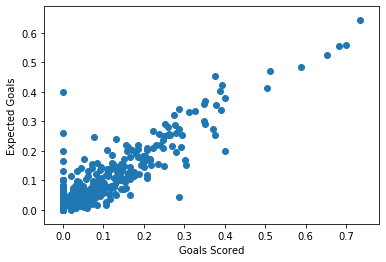

In [14]:
# Plot goals vs expected - mean total players
plt.scatter(player_data_mean.Gls, player_data_mean.xG)
plt.xlabel('Goals Scored')
plt.ylabel('Expected Goals')
plt.show()

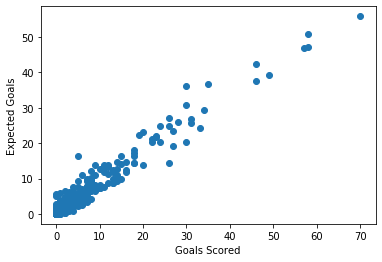

In [15]:
# Plot goals vs expected - sum total players
plt.scatter(player_data_sum.Gls, player_data_sum.xG)
plt.xlabel('Goals Scored')
plt.ylabel('Expected Goals')
plt.show()

In [16]:
# Create target - total player mean
y_var = player_data_mean.Gls
y_var.head()

Player
Aaron Connolly       0.117647
Aaron Cresswell      0.050633
Aaron Lennon         0.016667
Aaron Mooy           0.103448
Aaron Wan-Bissaka    0.000000
Name: Gls, dtype: float64

In [17]:
# Create features - total player mean
X = player_data_mean
X.head()

,Min,Gls,Ast,xG,npxG,xA,Sh,SoT,Fls,Fld,Crs,TklW,Int,CrdY,CrdR
Player,,,,,,,,,,,,,,,
Aaron Connolly,49.058824,0.117647,0.000000,0.137500,0.137500,0.011765,1.470588,0.529412,0.647059,1.705882,0.470588,0.235294,0.000000,0.000000,0.000000
Aaron Cresswell,84.645570,0.050633,0.101266,0.025316,0.025316,0.063291,0.582278,0.139241,0.468354,0.518987,4.632911,0.670886,1.202532,0.189873,0.000000
Aaron Lennon,60.300000,0.016667,0.050000,0.021667,0.021667,0.041667,0.316667,0.116667,0.733333,0.716667,1.183333,0.800000,0.616667,0.116667,0.000000
Aaron Mooy,81.103448,0.103448,0.057471,0.073563,0.055172,0.111628,1.126437,0.298851,0.701149,0.436782,4.793103,1.275862,0.804598,0.114943,0.011494
Aaron Wan-Bissaka,89.602941,0.000000,0.073529,0.008824,0.008824,0.069118,0.235294,0.014706,0.573529,0.500000,2.205882,1.779412,2.250000,0.147059,0.014706


In [18]:
# Split our preprocessed data into our features and target arrays
y = y_var
X = player_data_mean

In [19]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
# Create scaler instance
scaler = StandardScaler()

In [21]:
# Fit the scaler
X_scaler = scaler.fit(X_train)

In [22]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Define the linear regression model
lin_classifier = LinearRegression()

In [26]:
# Train the model
lin_classifier.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# Evaluate the model
y_pred = lin_classifier.predict(X_test)
print(f"Linear regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

ValueError: continuous is not supported